In [37]:
###Importing required packages
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1:</h1>
<b>Read the “FuelEfficiency.csv” dataset</b>
</div>

In [4]:
##Reading dataset
df = pd.read_csv("C:/Users/DELL/Downloads/ANA 1005/Assignment 2/FuelEfficiency.csv")

In [70]:
##Printing the first 5 rows of the dataset
df.head()

,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,New_Weight
0,A4,1.8,4,25550,12.8,9.1,3252,Sedan,Germany,1
1,3_Series,2.5,6,28100,14.1,9.7,3219,Sedan,Germany,1
2,G35,3.5,6,28150,15.7,10.9,3336,Sedan,Japan,1
3,X-Type,2.5,6,29330,14.9,10.1,3428,Sedan,England,1
4,C-class,1.8,4,29250,12.8,9.4,3250,Sedan,Germany,1
...,...,...,...,...,...,...,...,...,...,...
79,Element_EX,2.4,4,19700,12.8,10.9,3441,SUV,Japan,1
80,Escape_XLS,3.0,6,20400,14.9,11.3,3181,SUV,US,1
81,Liberty_Sport,2.4,4,18380,14.9,11.8,3648,SUV,US,1
82,Xterra_XE,3.3,6,20500,18.8,14.9,3777,SUV,Japan,1


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #2:</h1>
<b>Which pair of the variables in the dataset are most strongly correlated? Which pair of the variables in the dataset are most weakly correlated? Justify your answer using any suitable plot</b>
</div>

In [90]:
##Showing correlation between variables
df.corr().round(2)

,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds
Eng Size,1.00,0.91,0.69,0.85,0.74,0.76
Cylinders,0.91,1.00,0.75,0.80,0.67,0.72
MSRP,0.69,0.75,1.00,0.65,0.55,0.59
City_L/100km,0.85,0.80,0.65,1.00,0.87,0.86
Highway_L/100km,0.74,0.67,0.55,0.87,1.00,0.91
Weight_in_Pounds,0.76,0.72,0.59,0.86,0.91,1.00


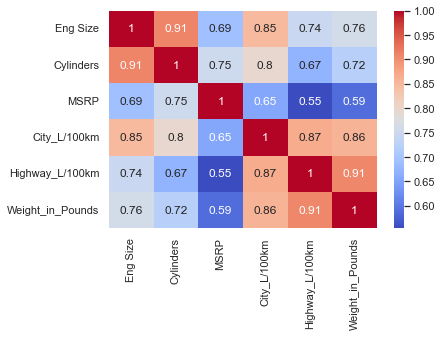

In [91]:
###Showing correlation with plot
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", cbar=True)
plt.show()

The most weakly correllated are the variables Highway_l/100km and MSRP at 0.55

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>What are the minimum and maximum weights (in pounds) in the dataset?</b>
</div>

In [10]:
##showing Minimum value
df["Weight_in_Pounds"].min()

2469

In [11]:
##showing Maximum Value
df["Weight_in_Pounds"].max()

6400

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #4:</h1>
<b>Add a column to the dataset to filter the weight in pounds variable. More specifically, create a column that has the value 1 for cars whose weight is less than 4000 pounds, and the value 0 for cars whose weight is greater than or equal to 4000 pounds. Essentially, we will use this filter to restrict the range of the weight variable to under 4000 pounds.</b>
</div>

In [28]:
###filtering dataset
df['New_Weight'] = np.where(df['Weight_in_Pounds']<4000, '1', '0')


In [98]:
###showing new column
df.head()

,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,New_Weight
0,A4,1.8,4,25550,12.8,9.1,3252,Sedan,Germany,1
1,3_Series,2.5,6,28100,14.1,9.7,3219,Sedan,Germany,1
2,G35,3.5,6,28150,15.7,10.9,3336,Sedan,Japan,1
3,X-Type,2.5,6,29330,14.9,10.1,3428,Sedan,England,1
4,C-class,1.8,4,29250,12.8,9.4,3250,Sedan,Germany,1


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Determine the correlation between weight in pounds and litres of fuel consumed per 100 km on the highway only for cars with a weight less than 4000 pounds. How does this value compare to the value obtained when considering all cars?</b>
</div>

In [61]:
##Subsetting data
df_suf = df[df["Weight_in_Pounds"]<4000]

df_suf.head()


,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,New_Weight
0,A4,1.8,4,25550,12.8,9.1,3252,Sedan,Germany,1
1,3_Series,2.5,6,28100,14.1,9.7,3219,Sedan,Germany,1
2,G35,3.5,6,28150,15.7,10.9,3336,Sedan,Japan,1
3,X-Type,2.5,6,29330,14.9,10.1,3428,Sedan,England,1
4,C-class,1.8,4,29250,12.8,9.4,3250,Sedan,Germany,1


In [93]:
###Showing correlation between two values
corr, _ = sp.stats.pearsonr(df_suf['Highway_L/100km'], df_suf['Weight_in_Pounds'])
corr.round(2)

0.72

The correlation comparion between the variable with all car and with car less than 4000 pounds, shows that the correlation is Less between the two values with cars less than 4000 pound at 0.72 and with all car at 0.91.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #6:</h1>
<b>Suppose I created a subset of the data to restrict the weight to between 3000 and 4000 pounds. Would the correlation between highway fuel consumption and weight subject to this restriction be greater than or less than the value you obtained in Question 7? Explain.</b>
</div>

In [77]:
df_subset = df[(df ["Weight_in_Pounds"]>= 3000) & (df["Weight_in_Pounds"] <= 4000)]
df_subset.head()

,Model,Eng Size,Cylinders,MSRP,City_L/100km,Highway_L/100km,Weight_in_Pounds,Type,Country,New_Weight
0,A4,1.8,4,25550,12.8,9.1,3252,Sedan,Germany,1
1,3_Series,2.5,6,28100,14.1,9.7,3219,Sedan,Germany,1
2,G35,3.5,6,28150,15.7,10.9,3336,Sedan,Japan,1
3,X-Type,2.5,6,29330,14.9,10.1,3428,Sedan,England,1
4,C-class,1.8,4,29250,12.8,9.4,3250,Sedan,Germany,1


In [94]:
corr2, _ = sp.stats.pearsonr(df_subset['Highway_L/100km'], df_subset['Weight_in_Pounds'])
corr2.round(2)

0.53

The correlation between both variables for cars between 3000 and 4000 pounds is at 0.53 which is lesser than the correlation between both variables of cars that a below 4000 pounds at 0.72.

Questions 7 is the same question as Question 6